In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the data from the csv file
data = pd.read_csv("beer_data.csv")

In [3]:
#Number of rows & columns of the given data
data.shape

(475984, 3)

#### The dataset has 4,75,984 rows & 3 columns

In [4]:
#Let's check if there are any null values
pd.isnull(data).sum()

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

#### As we see above, there are 100 null values in the column 'review_profilename'

In [5]:
#Top 5 rows check of the dataframe
data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [6]:
#Number of unique review_profilename
len(data.review_profilename.unique())

22498

#### The number of unique reviewers in the given dataset comes out to bee 22,498

In [7]:
#Number of unique beerid(s)
len(data.beer_beerid.unique())

40308

#### The number of unique beers are 40,308

In [8]:
#Let's check the number of unique ratings given to the beers
len(data.review_overall.unique())

10

#### Therefore, there are only 10 unique ratings in the given dataset

In [9]:
#Number of duplicate rows based upon beerId & review_profilename
data.duplicated(subset = ['beer_beerid', 'review_profilename'], keep = 'first').sum()

1424

#### There are 1424 duplicate rows

In [10]:
#Let's drop duplicates across all the columns i.e. if we have same set of rows in the given dataset
data.drop_duplicates(subset = ['beer_beerid', 'review_profilename'], inplace = True, keep = 'first')

In [11]:
#Shape of the dataframe after dropping the duplicates
data.shape

(474560, 3)

In [12]:
#The result of below subtraction must be equal to 1424 if the duplicate rows are successfully removed
475984-474560

1424

In [13]:
#Let's check the unique ratings & their count of occurence in the given dataset
data.review_overall.astype('category').value_counts()

4.0    174261
4.5     96959
3.5     90597
3.0     49435
5.0     27041
2.5     17570
2.0     11596
1.5      3811
1.0      3284
0.0         6
Name: review_overall, dtype: int64

In [14]:
#Let's remove the null values from the dataset
data = data.loc[~pd.isnull(data.review_profilename)]

In [15]:
# Let's check the shape of the dataset once again
data.shape

(474462, 3)

As we see, the count of rows has decreased by 100, therefore we have successfully removed the null rows

In [16]:
#Getting the count of ratings corresponding to each beerID
count_data = data.groupby('beer_beerid').count()[['review_profilename']].sort_values('review_profilename', ascending = False).reset_index()
count_data.columns = ['beer_id','number_of_ratings']

In [17]:
#Top 5 rows of the dataframe containing beer_id & number_of_ratings
count_data.head()

,beer_id,number_of_ratings
0,2093,977
1,412,966
2,1904,902
3,1093,840
4,92,812


In [18]:
#Let's check the number_of_ratings corresponding to each beer id at various percentiles
count_data.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.93,.95,.97,.99])

,beer_id,number_of_ratings
count,40304.000000,40304.000000
mean,36973.166460,11.772082
std,22544.756432,41.888449
min,3.000000,1.000000
10%,5754.600000,1.000000
20%,12902.600000,1.000000
30%,20923.900000,1.000000
40%,28986.600000,1.000000
50%,37366.500000,2.000000
60%,44895.800000,2.000000


#### Let's choose minimum number of ratings to be 51 for a beer & filter the dataset

In [19]:
#Filtering list of required ids i.e. the beer ids with number of ratings greater than or eqal to 51
listOfRequiredIds = count_data.loc[count_data.number_of_ratings >= 51]

In [20]:
#Checking the shape which would tell us how many beers are we going to analyze
listOfRequiredIds.shape

(2028, 2)

#### Therefore, we would building are model on & for 2028 beers

In [21]:
#Converting series of beer_id to list so as to use to filter
listOfRequiredBeerIds = list(listOfRequiredIds.beer_id)

In [22]:
#Preparing the final dataframe by filtering only the required beer ids
filtered_data = data.loc[data.beer_beerid.isin(listOfRequiredBeerIds)]

In [23]:
#Checking the shape of the new dataframe
filtered_data.shape

(294197, 3)

In [24]:
#Checking the first 5 rows of the filtered dataframe containing beers with number of ratings greater than 50
filtered_data.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0


In [25]:
# Let's explore the unique values of ratings we're left with after filteration
pd.DataFrame(filtered_data.review_overall.astype('category').value_counts())

,review_overall
4.0,110316
4.5,66724
3.5,51606
3.0,26895
5.0,20076
2.5,9038
2.0,5987
1.5,1873
1.0,1682


In [26]:
#Formulating average rating for each of the beerID
dataToPlot = filtered_data.groupby('beer_beerid').mean().sort_values('review_overall',ascending = False).reset_index()
dataToPlot.head()

,beer_beerid,review_overall
0,16814,4.650735
1,1545,4.622276
2,21690,4.608108
3,7971,4.596401
4,47658,4.586592


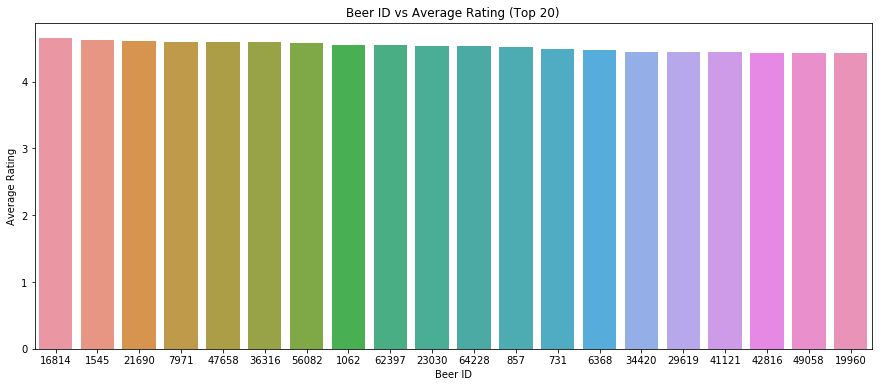

In [27]:
# Plotting the average beer ratings of top 20 rated beers
plt.figure(figsize = (15,6))
plt.title('Beer ID vs Average Rating (Top 20)')
ax = sns.barplot(x = 'beer_beerid', y = 'review_overall', data = dataToPlot.head(20), order = dataToPlot['beer_beerid'].head(20))
sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Beer ID", ylabel = "Average Rating")
plt.show()

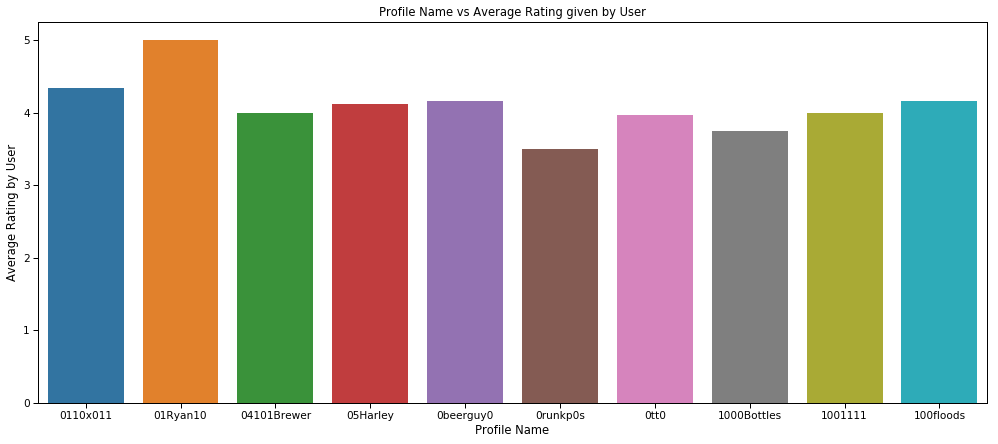

In [28]:
# Plotting the average user ratings of random 10 users
plt.figure(figsize = (17,7))
plt.title("Profile Name vs Average Rating given by User")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = filtered_data.groupby('review_profilename').mean().reset_index().head(10))
plt.xlabel("Profile Name") 
plt.ylabel("Average Rating by User")
plt.show()

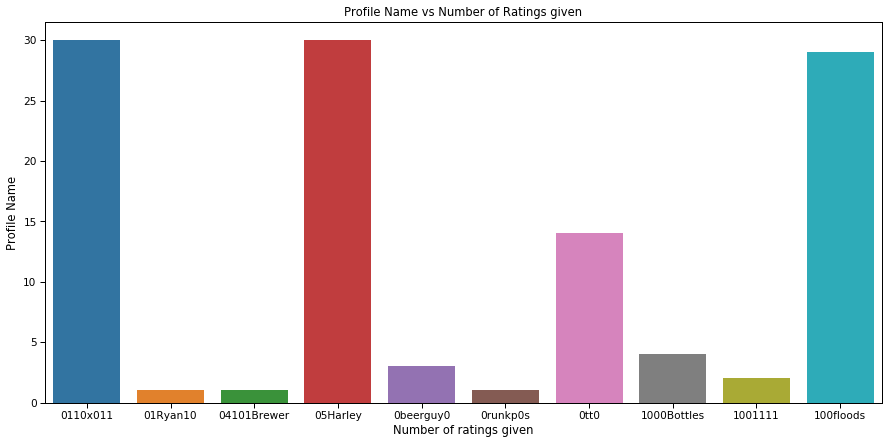

In [29]:
# Plotting the number of ratings given by user of random 10 users
plt.figure(figsize = (15,7))
plt.title("Profile Name vs Number of Ratings given")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = filtered_data.groupby('review_profilename').count().reset_index().head(10))
plt.xlabel("Number of ratings given")
plt.ylabel("Profile Name")
plt.show()

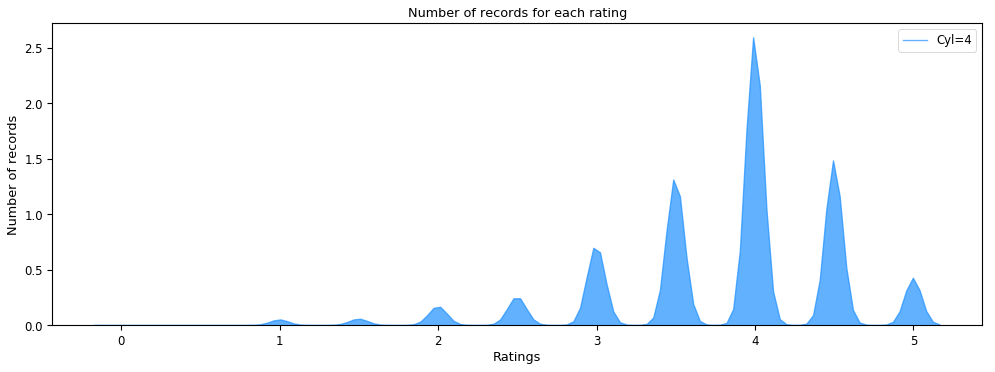

In [30]:
plt.figure(figsize=(15,5), dpi= 80)
plt.title("Number of records for each rating")
sns.kdeplot(data['review_overall'], shade=True, color="dodgerblue", label="Cyl=4", alpha=.7)
plt.xlabel('Ratings')
plt.ylabel('Number of records')
plt.show()

#### We see from the above plot that most of the ratings are between the range 3.5 to 4.5

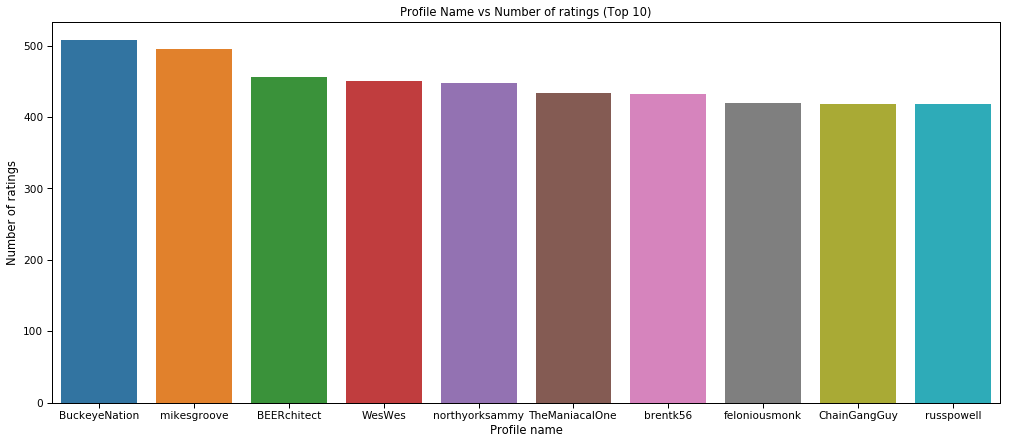

In [31]:
# Plotting the number of ratings of top 10 users(Based on number of ratings provided)
plt.figure(figsize = (17,7))
plt.title("Profile Name vs Number of ratings (Top 10)")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = filtered_data.groupby('review_profilename').count().sort_values('review_overall',ascending = False).reset_index().head(10))
plt.xlabel("Profile name")
plt.ylabel("Number of ratings")
plt.show()

#### BuckeyNation has given the highest number of records

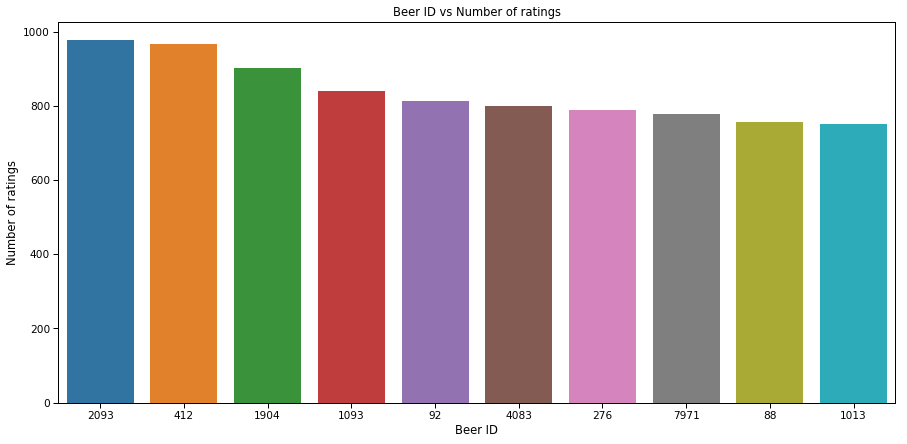

In [32]:
# Plotting the number of ratings of top 10 beers(based on the number of ratings for each beer)
plt.figure(figsize = (15,7))
plt.title('Beer ID vs Number of ratings')
dataToPlot = filtered_data.groupby('beer_beerid').count().sort_values('review_overall',ascending = False).reset_index().head(10)
sns.barplot(x = 'beer_beerid', y = 'review_overall', data = dataToPlot, order = dataToPlot['beer_beerid'])
plt.xlabel('Beer ID')
plt.ylabel('Number of ratings')
plt.show()

#### As seen above, beer id 2093 has the highest number of ratings received which means it must be the most popular one. On the second place can be seen beer id 412 with a very small difference from the beer in the number one position.

In [33]:
#Average of the number of ratings as it seems from the question 'The average number of ratings given to the beers'
filtered_data.groupby('beer_beerid').count().mean()

review_profilename    145.067554
review_overall        145.067554
dtype: float64

In [34]:
#Average of the number of ratings as it seems from the question 'The average number of ratings given by the users'
filtered_data.groupby('review_profilename').count().mean()

beer_beerid       15.128143
review_overall    15.128143
dtype: float64

In [35]:
#Preparing data for plotting the number of ratins for each rating in a pie plot
piePlotData = pd.DataFrame(filtered_data.review_overall.astype('category').value_counts())
piePlotData

,review_overall
4.0,110316
4.5,66724
3.5,51606
3.0,26895
5.0,20076
2.5,9038
2.0,5987
1.5,1873
1.0,1682


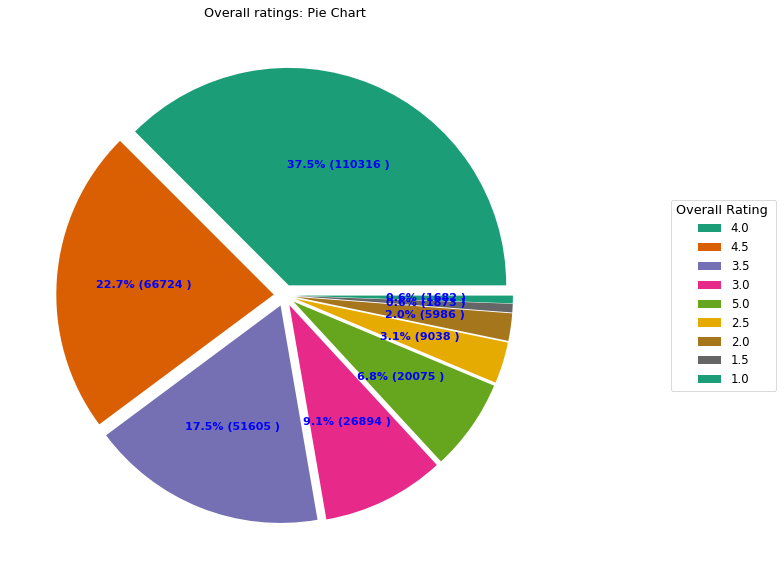

In [36]:
#Plotting the number of ratins for each rating in a pie plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"), dpi= 80)

df = pd.DataFrame(piePlotData)
data1 = df['review_overall']
categories = df.index
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data1, 
                                  autopct=lambda pct: func(pct, data1),
                                  textprops=dict(color="b"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=0,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Overall Rating ", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Overall ratings: Pie Chart")

plt.show()

#### As seen above, the higest portion of ratings received are for rating 4.0 with 37.5% records. Then comes rating 4.5 & then 3.5. The least number of records are for rating 1.0

# Model Preparation

### Dividing the dataset into train & test

In [37]:
#Importing the test train split library
from sklearn.model_selection import train_test_split

In [38]:
#Splitting the data into test & train with 30% in test & 70% in train
train, test = train_test_split(filtered_data, test_size=0.30, random_state=31)

In [39]:
#Checking the shapes of the test & train datasets
print(train.shape)
print(test.shape)

(205937, 3)
(88260, 3)


In [40]:
#Checking train data
train.head()

,beer_beerid,review_profilename,review_overall
162658,5948,TheEclecticGent,4.5
217111,2961,Franchise,4.0
29063,54089,Jayli,3.0
24752,3558,terrabyte,3.5
312729,20768,darklordlager,4.0


In [41]:
# pivot ratings into beer features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [42]:
#Checking pivoted beer data
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the beer which has not been rated by the user. To ignore the beer rated by the user, we will mark it as 0 during prediction. The beer not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beer rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [43]:
#Creating copy of the datasets
dummy_train = train.copy()
dummy_test = test.copy()

In [44]:
#Converting the ratings to 1/0 depending on the above logic
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [45]:
#Checking first few rows of dummy_train
dummy_train.head()

,beer_beerid,review_profilename,review_overall
162658,5948,TheEclecticGent,0
217111,2961,Franchise,0
29063,54089,Jayli,0
24752,3558,terrabyte,0
312729,20768,darklordlager,0


In [46]:
#Checking first few rows of dummy_test
dummy_test.head()

,beer_beerid,review_profilename,review_overall
278679,2766,beerguy101,1
28522,30420,nrbw23,1
209402,6590,Kolsch,1
121311,12104,Deuane,1
70376,43341,JBON,1


In [47]:
# For dummy_train, the beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

In [48]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
# For dummy_test, the beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [50]:
#Checking dummy_test dataframe
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building User Similarity Matrix

## Using Cosine Similarity

In [51]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [52]:
#Checking user_correlation shape
user_correlation.shape

(17202, 17202)

## Using adjusted Cosine 

### Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [53]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [54]:
#checking beer_features dataframe
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user aroung 0 mean

In [55]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [56]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [57]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [58]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Rating predicted by the user (for beers rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset). 

In [59]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[1.18210979, 2.39586718, 2.00712931, ..., 1.30620554, 2.19226756,
        1.58426839],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56729534, 5.22367115, 2.53076101, ..., 0.44452145, 0.71906464,
        2.19279431],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
user_predicted_ratings.shape

(17202, 2028)

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero. 

In [61]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.182110,2.395867,2.007129,2.383969,0.117704,1.158166,2.348213,1.834791,5.900556,3.069009,...,0.807601,2.263625,6.130013,0.537544,0.302546,0.470864,1.041869,1.306206,2.192268,1.584268
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.431752,4.224999,2.486638,5.221106,0.468807,1.552946,4.277244,2.620628,12.121386,4.876519,...,2.092030,2.979623,7.615892,1.598967,2.103561,2.601054,2.245057,0.755234,4.726285,2.286082
0beerguy0,0.667724,2.713345,1.434856,2.287425,1.973061,0.338014,2.287190,0.928182,2.797073,3.126014,...,0.000000,0.428374,0.762840,0.229627,0.620361,0.219960,0.062112,0.442603,0.242318,0.293490


### Finding the top 5 recommendation for the user 3

In [62]:
user_final_rating.iloc[3].sort_values(ascending=False)[0:5]

beer_beerid
412      30.017483
17112    28.251250
4083     27.088169
19960    26.874796
1904     24.497512
Name: 05Harley, dtype: float64

As we see above, the top 5 recommendations for user 3 are beers with beer ID 412, 17112, 4083, 19960, 1904

# Item Based Similarity

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different beer ID. In the user based similarity, we had taken mean for each user intead of each beer. 

In [63]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1050Sudz,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the beer rating for each beer

In [64]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [65]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1050Sudz,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [66]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00  8.29686245e-03  2.31720924e-03 ...  7.95984223e-05
   1.41341239e-02 -3.28010645e-03]
 [ 8.29686245e-03  1.00000000e+00  1.74066299e-03 ... -1.34282657e-02
   2.26833774e-03  4.21673842e-03]
 [ 2.31720924e-03  1.74066299e-03  1.00000000e+00 ...  0.00000000e+00
   8.66663720e-04  2.16803081e-02]
 ...
 [ 7.95984223e-05 -1.34282657e-02  0.00000000e+00 ...  1.00000000e+00
   9.49920731e-03  2.53744976e-02]
 [ 1.41341239e-02  2.26833774e-03  8.66663720e-04 ...  9.49920731e-03
   1.00000000e+00 -1.74653081e-02]
 [-3.28010645e-03  4.21673842e-03  2.16803081e-02 ...  2.53744976e-02
  -1.74653081e-02  1.00000000e+00]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [67]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.00000000e+00, 8.29686245e-03, 2.31720924e-03, ...,
        7.95984223e-05, 1.41341239e-02, 0.00000000e+00],
       [8.29686245e-03, 1.00000000e+00, 1.74066299e-03, ...,
        0.00000000e+00, 2.26833774e-03, 4.21673842e-03],
       [2.31720924e-03, 1.74066299e-03, 1.00000000e+00, ...,
        0.00000000e+00, 8.66663720e-04, 2.16803081e-02],
       ...,
       [7.95984223e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.49920731e-03, 2.53744976e-02],
       [1.41341239e-02, 2.26833774e-03, 8.66663720e-04, ...,
        9.49920731e-03, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.21673842e-03, 2.16803081e-02, ...,
        2.53744976e-02, 0.00000000e+00, 1.00000000e+00]])

# Prediction

In [68]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.0994061 , 0.87828887, 0.90919557, ..., 0.61956095, 0.73947902,
        0.84775993],
       [0.        , 0.        , 0.04009755, ..., 0.17084681, 0.08474766,
        0.        ],
       [0.        , 0.05553946, 0.02182215, ..., 0.        , 0.        ,
        0.10862397],
       ...,
       [0.15924966, 0.        , 0.09191914, ..., 0.04902684, 0.13055952,
        0.07705083],
       [0.00274526, 0.18399622, 0.05598312, ..., 0.        , 0.02388247,
        0.09404912],
       [0.        , 0.02822365, 0.03963099, ..., 0.        , 0.        ,
        0.        ]])

In [69]:
item_predicted_ratings.shape

(17202, 2028)

In [70]:
dummy_train.shape

(17202, 2028)

### Filtering the rating only for the beers not rated by the user for recommendation

In [71]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.099406,0.878289,0.909196,0.593557,0.803908,0.460722,0.428624,0.204372,0.995046,0.774910,...,0.849710,0.470616,0.890109,0.609071,0.218864,0.409848,0.107322,0.619561,0.739479,0.847760
01Ryan10,0.000000,0.000000,0.040098,0.000000,0.000000,0.000000,0.064517,0.000000,0.024697,0.000000,...,0.374977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170847,0.084748,0.000000
04101Brewer,0.000000,0.055539,0.021822,0.039627,0.000000,0.000000,0.000000,0.000000,0.071548,0.183827,...,0.000000,0.000000,0.103284,0.019016,0.000000,0.000000,0.000000,0.000000,0.000000,0.108624
05Harley,0.902619,0.842791,0.851105,0.847210,0.332496,0.242188,0.565839,0.470758,0.862658,0.668880,...,0.584657,0.807530,0.889584,0.995129,0.112249,0.858225,0.527618,0.315805,0.915341,0.546106
0beerguy0,0.058605,0.292626,0.119413,0.318746,0.121850,0.282048,0.127374,0.030503,0.031454,0.133798,...,0.000000,0.000000,0.018010,0.009327,0.064900,0.020712,0.000000,0.033577,0.018466,0.049536


### Top 5 prediction for the user - 3

In [72]:
item_final_rating.iloc[3].sort_values(ascending=False)[0:5]

beer_beerid
48194    2.448220
782      2.095456
27476    2.063913
51512    2.045652
70102    1.976326
Name: 05Harley, dtype: float64

### Compute and visualise the similarity between the first 10 beers.

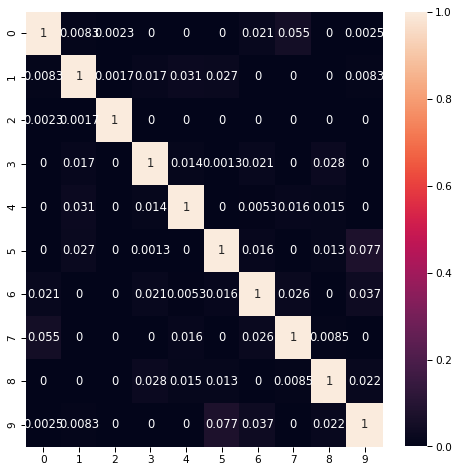

In [73]:
# Heatmap plot for first 10 items
plt.figure(figsize=(8,8))
sns.heatmap(item_correlation[0:10,0:10], annot = True,linewidths=.0)

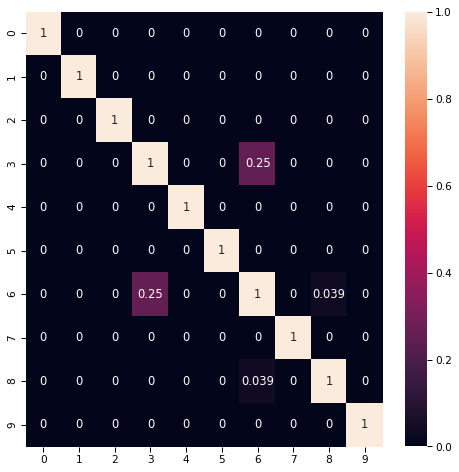

In [74]:
# Heatmap plot for first 10 users
plt.figure(figsize=(8,8))
sns.heatmap(user_correlation[0:10,0:10], annot = True,linewidths=.0)

### Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [75]:
#Top 5 beers recommended to 'cokes' based on item based model
item_final_rating.loc["cokes"].sort_values(ascending=False)[0:5]

beer_beerid
36179    12.054260
28268    11.488170
24905    11.420307
2219     10.555685
28267    10.515109
Name: cokes, dtype: float64

In [76]:
#Top 5 beers recommended to 'cokes' based on user based model
user_final_rating.loc["cokes"].sort_values(ascending=False)[0:5]

beer_beerid
412     42.048229
1093    38.781419
1708    36.911971
4083    36.850615
34      36.494164
Name: cokes, dtype: float64

In [77]:
#Top 5 beers recommended to 'genog' based on item based model
item_final_rating.loc["genog"].sort_values(ascending=False)[0:5]

beer_beerid
2508    4.048396
408     3.763220
356     3.730033
7799    3.685414
646     3.651358
Name: genog, dtype: float64

In [78]:
#Top 5 beers recommended to 'genog' based on user based model
user_final_rating.loc["genog"].sort_values(ascending=False)[0:5]

beer_beerid
2093    33.613647
1093    32.375077
1013    29.789423
34      29.485823
92      29.386374
Name: genog, dtype: float64

In [79]:
#Top 5 beers recommended to 'giblet' based on item based model
item_final_rating.loc["giblet"].sort_values(ascending=False)[0:5]

beer_beerid
259     4.037665
1015    3.918037
9182    3.867526
729     3.732890
782     3.609797
Name: giblet, dtype: float64

In [80]:
#Top 5 beers recommended to 'giblet' based on user based model
user_final_rating.loc["giblet"].sort_values(ascending=False)[0:5]

beer_beerid
2093    63.411020
104     62.002390
412     61.935268
1093    56.511968
34      53.872070
Name: giblet, dtype: float64

# Evaluation

Evaluation will be same as we have seen above for the prediction. The only difference being, we will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

## Using User Similarity

In [81]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [82]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.25759248, 1.03114226, 0.42726579, ..., 0.16461519, 0.60528718,
        0.74483352],
       [0.17607375, 0.59829136, 0.41797999, ..., 0.71338242, 0.        ,
        0.26969114],
       [0.35672692, 0.63287196, 0.06750944, ..., 0.6041211 , 0.        ,
        0.07923394],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53947716, 1.81844717, 0.45549682, ..., 0.00343226, 0.73337831,
        1.22483534],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Doing prediction for the movies rated by the user

In [83]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [84]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beers rated by user. For  RMSE,  no need for normalising the rating to (1,5) range as its already in the provided range

In [85]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

print(X)

beer_beerid         5      6      7      10     14     15     17     19     \
review_profilename                                                           
0110x011              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
05Harley              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0tt0                  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1001111               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
100floods             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1099                  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1121987               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11millsown113         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11osixBrew            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11thFloorBrewing      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1229design            NaN    NaN    NaN    NaN    NaN    NaN    

In [86]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [87]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(X))

In [88]:
rmse = (sum(sum((test_ - X )**2))/total_non_nan)**0.5
print(rmse)

18.595044738286237


## Using Item similarity

In [89]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [90]:
test_item_correlation.shape

(2028, 2028)

In [91]:
test_beer_features.shape

(2028, 12257)

In [92]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [94]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]
y = X
# scaler = MinMaxScaler(feature_range=(1, 5))
# print(scaler.fit(X))
# y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [95]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.2065140858009595


### As seen, the rmse value for item based prediction is far less than the user based predictions. Therefore, we'll choose item based prediction  model as the best model & choose it for deployment.